In [1]:
from PIL import Image
import time
from keras.models import load_model
import numpy as np
from vis.visualization import visualize_cam, overlay
from vis.utils import utils
from keras.activations import linear

import matplotlib.pyplot as plt
import cv2

from vis.visualization import visualize_cam
from math import sqrt
import time

Using TensorFlow backend.
/home/isua/anaconda3/envs/CAPRI/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/isua/anaconda3/envs/CAPRI/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/isua/anaconda3/envs/CAPRI/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/isua/anaconda3/envs/CAP

In [2]:
def my_load_img(f):
    img = Image.open(f)
    fp = img.fp
    img.load()
    fp.closed
    return img

In [4]:
def heatmap_generator(image_path, model,real_class):
    
    started_time = time.time()
    # Image modification 
    image1_normal_original = my_load_img(image_path)
    image1_normal = image1_normal_original.convert("L")
    image1_normal = np.array(image1_normal.resize((150,150)))
    image1_normal = np.expand_dims(np.array(image1_normal),2) /255
    image1_normal = np.divide(image1_normal, image1_normal.mean())
    image1_normal = np.array(image1_normal)
    
    # Prediction of each class
    prediction = model.predict(np.array([image1_normal]))
    print(prediction)
    
    prob0 = prediction[0][0]
    
    prob1 = 1- prob0
    print(prob1)
    # Generate heatmap of neuron 0)
    layer    = -1
    model.layers[layer].activation = linear
    model_with_linear_output = utils.apply_modifications(model)
    exponente = 0.7
    porc = 0.8
    imagen_RGB = np.concatenate((image1_normal, image1_normal, image1_normal), axis=2)

    grads_0  = visualize_cam(model_with_linear_output,
                                   layer, filter_indices=0,
                                   seed_input=image1_normal,
                                   backprop_modifier='guided')

        
    # Generate heatmap of neuron 1   
    layer    = -1
    model.layers[layer].activation = linear
    model_with_linear_output = utils.apply_modifications(model)
    exponente = 0.7
    porc = 0.8
    imagen_RGB = np.concatenate((image1_normal, image1_normal, image1_normal), axis=2)
    grads_1  = visualize_cam(model_with_linear_output,
                                   layer, filter_indices=1,
                                   seed_input=image1_normal,
                                   backprop_modifier='guided')

    image1_normal= image1_normal[:, :, 0]
    
    max_value = max(grads_0.max(), grads_1.max())
    
    f, axs = plt.subplots(1, 3,figsize=(20,5))
    
    axs[0].imshow(image1_normal, cmap='gray')
    axs[0].set_title('Neuron 0, \n prob='+str(prob0), fontsize=20)
    
    axs[1].imshow(image1_normal, cmap='gray') 
    axs[1].set_title('Original image')
    
    axs[2].imshow(image1_normal, cmap='gray') 
    axs[2].set_title('Neuron 1, \n prob='+str(prob1), fontsize=20)

    pos = axs[0].imshow(grads_0, cmap='hot', alpha=0.5)
    pos.set_clim(0, max_value)
    f.colorbar(pos, ax=axs[0])
    pos = axs[2].imshow(grads_1, cmap='hot', alpha=0.5)
    pos.set_clim(0, max_value)
    f.colorbar(pos, ax=axs[2])

W0319 20:16:40.457420 140463494068032 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


[[9.9973637e-01 2.6363065e-04]]
0.00026363134384155273


W0319 20:16:44.968181 140463494068032 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0319 20:16:49.434488 140463494068032 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


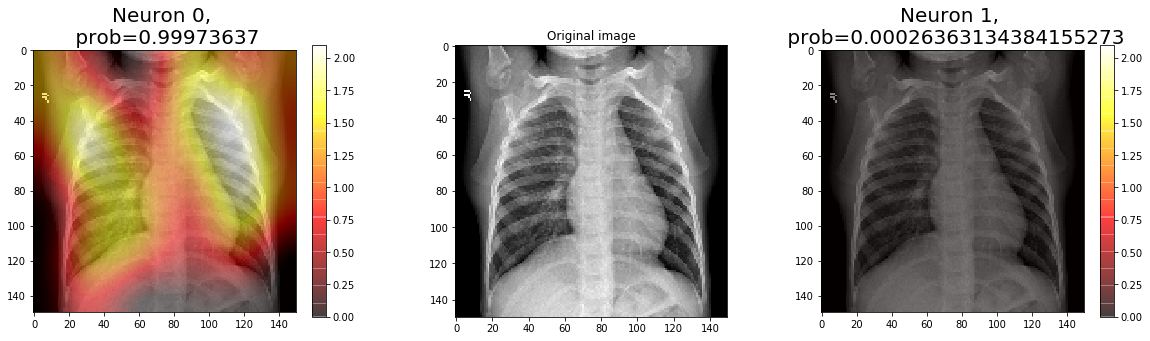

In [7]:
image_path = '/home/isua/Escritorio/chest-xray-pneumonia (1)/dataset_xrays/train/NORMAL/IM-0166-0001.jpeg'
model = load_model('/home/isua/Escritorio/experiment_kfold/model_comparison_10kfold/model_102/saved_model/manuel_version102_kfold10_0.h5')
start = time.time()
heatmap_generator(image_path, model, 'normal')
end = time.time()

In [ ]:
image_path = '/home/isua/Escritorio/chest-xray-pneumonia (1)/dataset_xrays/train/PNEUMONIA/person383_bacteria_1751.jpeg'
model = load_model('/home/isua/Escritorio/experiment_kfold/model_comparison_10kfold/model_102/saved_model/manuel_version102_kfold10_0.h5')
start = time.time()
heatmap_generator(image_path, model, 'consolidation')
end = time.time()

In [ ]:
"/home/isua/CAPRI_WEBAPP/jupyter_home/start_webapp.sh"